
### **Advanced Clustering Techniques**

1. **Hierarchical Agglomerative Clustering (HAC):** A method that builds nested clusters by successively merging or splitting groups.
2. **Density-Based Clustering: DBScan & HDBScan:** Techniques that cluster data into dense regions separated by sparser regions.
3. **Spectral Clustering:** A graph-based approach that uses the spectrum of the graph Laplacian to cluster nodes.
4. **Gaussian Mixture Models (GMM):** Probabilistic models that assume data is generated from a mixture of several Gaussian distributions.
5. **Mean-shift Clustering:** A method that identifies modes in the data distribution using kernel density estimation.

**Key Takeaway:**
- Not all data is spherical or convex, and thus, not all clustering techniques will fit every dataset.
- The choice of clustering algorithm can influence the shapes, sizes, and types of clusters we discover.
- Understanding the strengths and limitations of each technique is crucial for effective data analysis.


### **Hierarchical Agglomerative Clustering (HAC)**

Hierarchical Agglomerative Clustering (HAC) is one of the most intuitive and fundamental clustering methods. Unlike k-means, which partitions the dataset into non-overlapping clusters, HAC builds a hierarchy or a tree of clusters.

**How Does HAC Work?**

1. **Initialization:** Start by treating each data point as a single cluster. Thus, if there are *N* data points, we have *N* clusters at the start.

2. **Agglomeration:** In each of the subsequent stages, the two clusters that are closest to each other are merged into a single cluster, reducing the total number of clusters by one.

3. **Completion:** This process is repeated until there is only one single cluster left, comprising all data points. The result of this process is a tree-like diagram called a **dendrogram**, which shows the sequence in which clusters were merged and can give insights into the hierarchical structure of the data.


In [1]:
#Sklearn's implementation is the "AgglomerativeClustering" method
#n_clusters allows us to determine where the cut point is

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Perform HAC
hac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hac.fit_predict(data)

print(labels)  # This will print the cluster labels for each sample in the Iris dataset


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


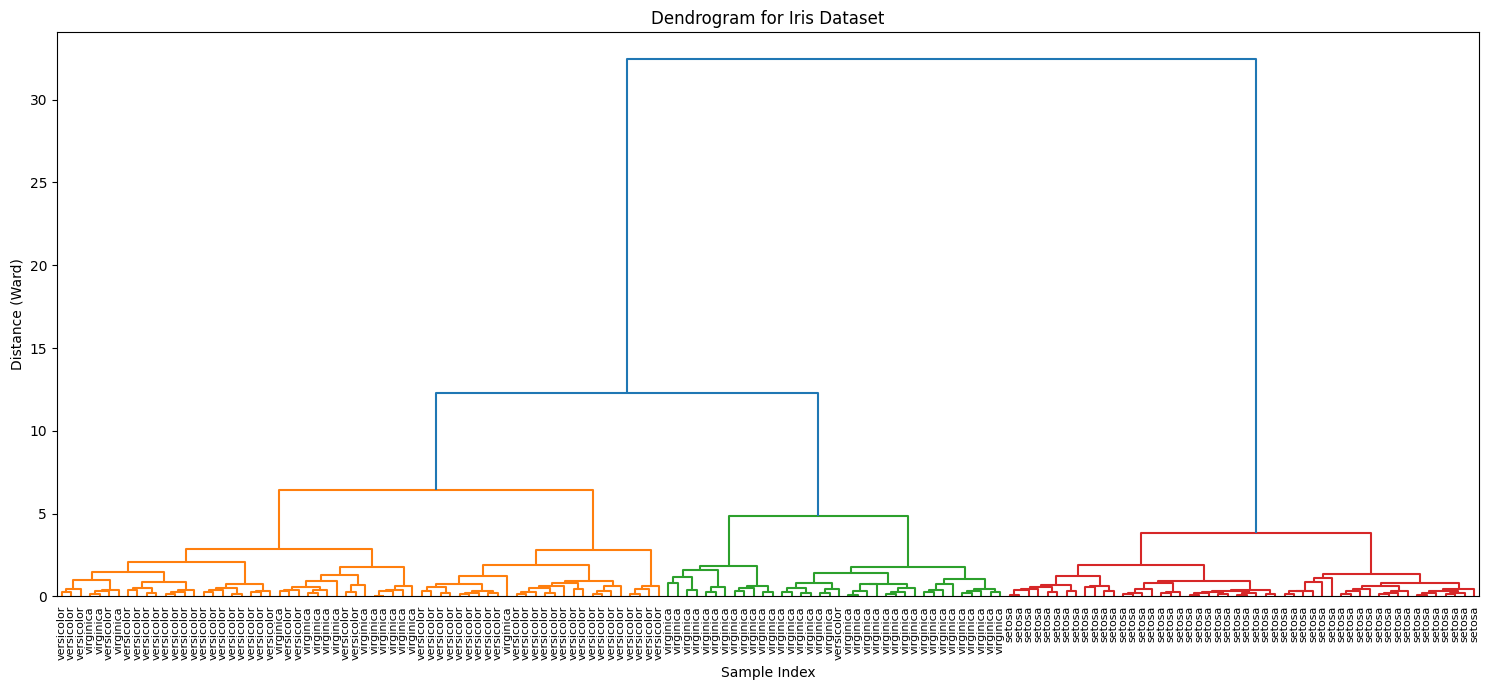

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Convert target classes to string labels
label_names = iris.target_names
labels = [label_names[i] for i in target]

# Perform hierarchical clustering
linked = linkage(data, 'ward')

# color threshold sets where the topmost clusters are
color_threshold = 10

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', labels=labels, leaf_font_size=8, color_threshold=color_threshold)
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward)')
plt.tight_layout()
plt.show()



Note that as with k-means, determining how many clusters remains a challenge.  All the methods used in k-means (elbow method, silhouette scores, visual inspection, stability analysis, etc.) can be applied here as well.

#### Understanding linkage

The key to HAC is the criterion used to determine the "distance" between two clusters, known as the linkage. There are several linkage methods:

- **Single Linkage:** The distance between two clusters is defined as the shortest distance between two points in each cluster.
- **Complete Linkage:** The distance is defined as the maximum distance between two points in each cluster.
- **Average Linkage:** The distance between clusters is the average distance between each point in one cluster to every point in the other cluster.

|![single linkage](assets/single_linkage.png) |![avg linkage](assets/average_linkage.png)  |![complete linkage](assets/complete_linkage.png)  |
|--|--|--|
|Single linkage|Average linkage|Complete linkage|

- **Ward's Linkage:** Ward's linkage is a little trickier, but often outperforms the others. In a nutshell, the distance between clusters is calculated as the increase in the squared error (within cluster variance) when two clusters are merged. Formally:

Given two clusters $ C_i $ and $ C_j $, the increase in the squared error (or variance) when merging them is given by:

$$ \Delta_{ij} = \frac{|C_i| \times |C_j|}{|C_i| + |C_j|} \times d^2(C_i, C_j) $$

Where:
- $ |C_i| $ and $ |C_j| $ are the number of points in clusters $ C_i $ and $ C_j $ respectively.
- $ d(C_i, C_j) $ is the distance between the centroids of the two clusters. This distance is typically computed using the Euclidean distance.

The term $ \frac{|C_i| \times |C_j|}{|C_i| + |C_j|} $ is a scaling factor that accounts for the sizes of the two clusters. It ensures that large and distant clusters don't dominate the decision to merge.

In Ward's method, at each step of the agglomeration, the pair of clusters that results in the smallest value of $ \Delta_{ij} $ (i.e., the smallest increase in total variance) is merged.

The Ward linkage method tends to produce more equally-sized and spherical clusters. This is because it bases its decisions on minimizing the variance, which in turn can be thought of as minimizing the spread of cluster points around their centroid. 

However, it's important to note that Ward's method assumes that the clusters are roughly spherical and equally sized, and it may not work as well when these assumptions are violated.


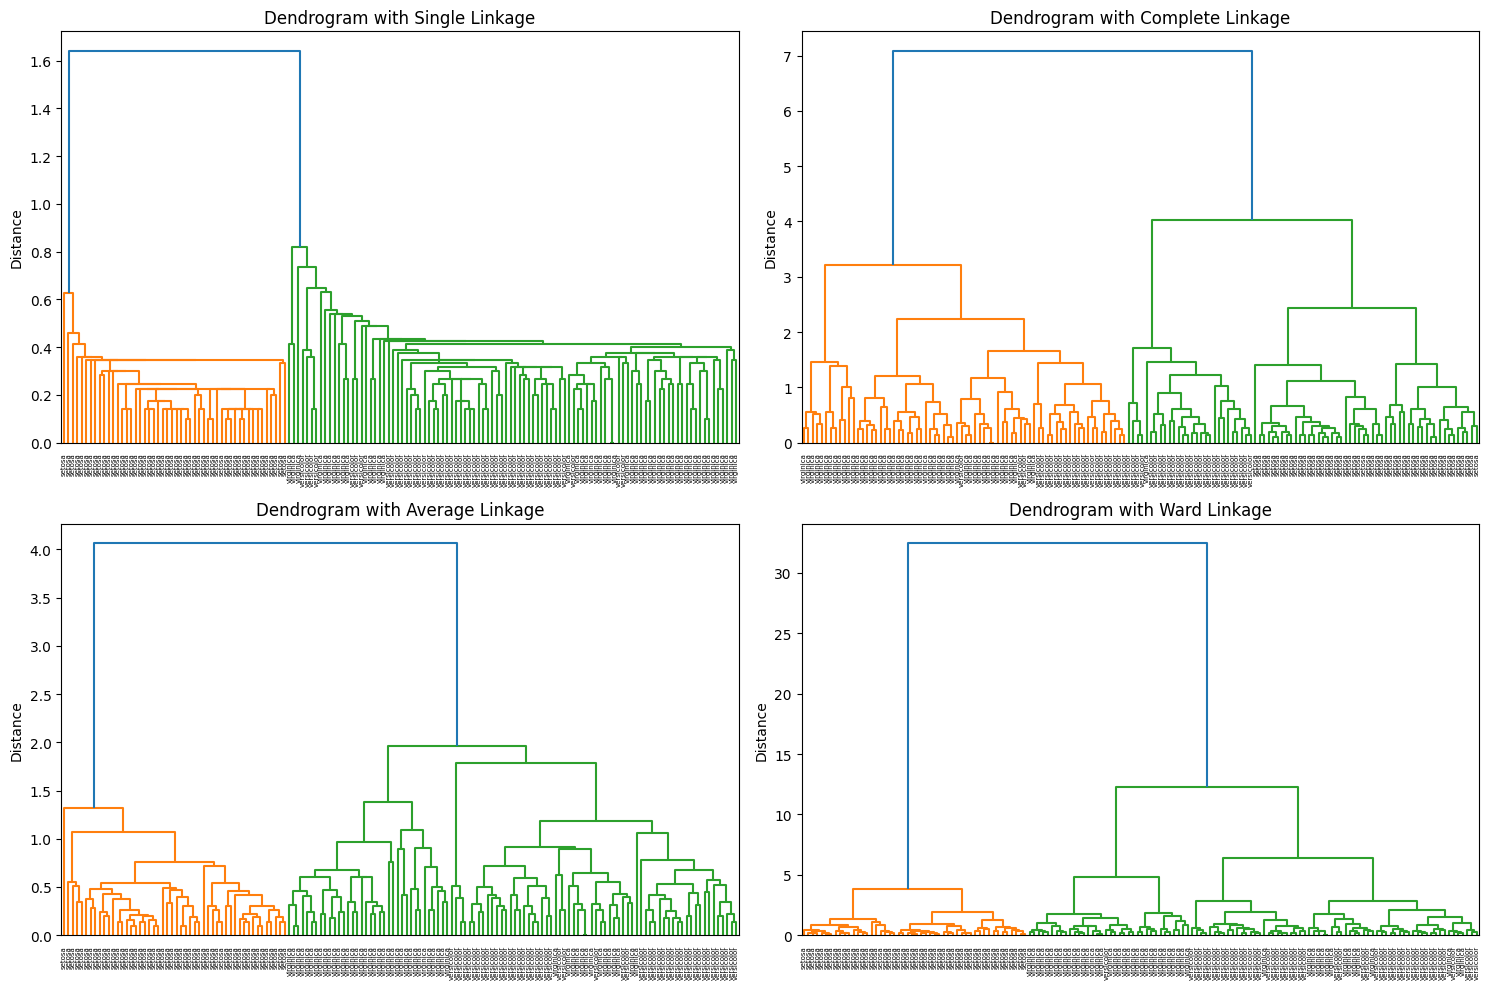

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Convert target indices to string labels
label_names = iris.target_names
labels = [label_names[i] for i in target]

# List of linkage methods to be explored
linkage_methods = ['single', 'complete', 'average', 'ward']

# Plot dendrograms for each linkage method
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods, 1):
    linked = linkage(data, method)
    
    plt.subplot(2, 2, i)
    dendrogram(linked, labels=labels, leaf_font_size=5)
    plt.title(f'Dendrogram with {method.capitalize()} Linkage')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()




**Advantages of HAC:**

1. **No Need to Specify Number of Clusters:** Unlike k-means, we don't need to define the number of clusters a priori. The number of clusters can be determined by inspecting the dendrogram.
2. **Flexibility with Distance Metrics:** Can use any desired distance metric using the "metric" parameter in scipy (Euclidean, Manhattan, Cosine, etc.).
3. **Provides Hierarchical Decomposition:** Can be useful if the data has inherent hierarchical structure.

**Limitations of HAC:**

1. **Computational Complexity:** HAC can be computationally expensive for large datasets.
2. **Irreversible:** Once a decision is made to combine two clusters, it cannot be undone.

**Practical Tips and Considerations:**

1. **Scaling:** It's generally a good practice to scale the data so that all features have the same weight.
2. **Noise and Outliers:** HAC can be sensitive to noise and outliers. Consider preprocessing steps to mitigate their impact.
3. **Choosing the Right Linkage:** The choice of linkage can significantly impact the resulting clusters. It's often beneficial to experiment with different linkages to see which one works best for a particular dataset.